**Problem Statement**

This is a Property Loan Status Prediction dataset, we have the data of applicants who had previously applied for the loan based on the property and
applicant-based metrics. The bank will decide whether to give a loan to the applicant based on some factors such as Applicant Income, Loan Amount, previous Credit History, Co- applicant Income, etc. The objective is to build a Machine Learning Model to predict the loan to be approved or to be rejected for an applicant.

# **Data Processing**

**Importing libraries and Data**

In [787]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [788]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [789]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [790]:
train_data.shape

(614, 13)

In [791]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [792]:
test_data.shape

(367, 12)

# **EDA**

**Analysing the features**

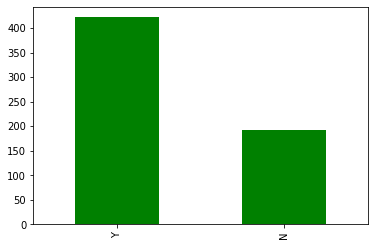

In [793]:
train_data['Loan_Status'].value_counts().plot.bar(color='green')


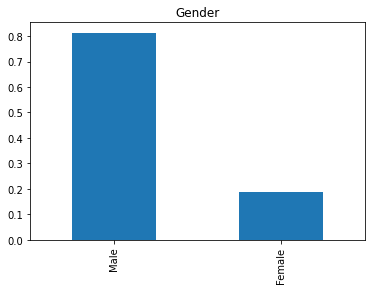

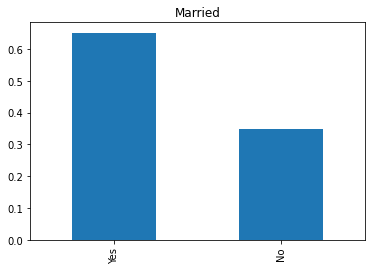

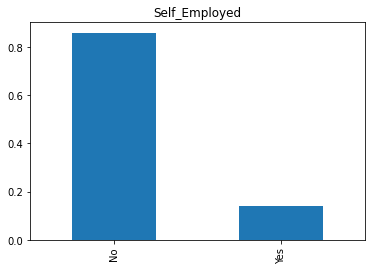

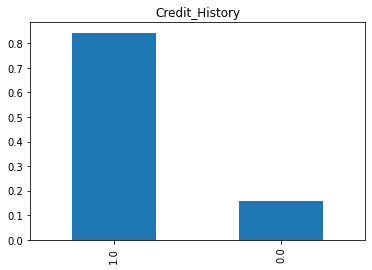

In [794]:
train_data['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
train_data['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
train_data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
train_data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

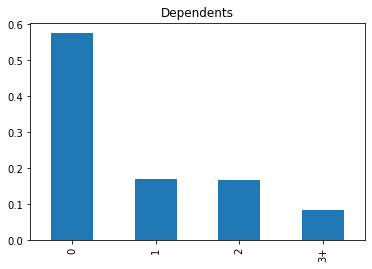

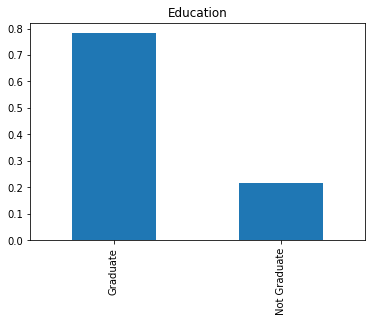

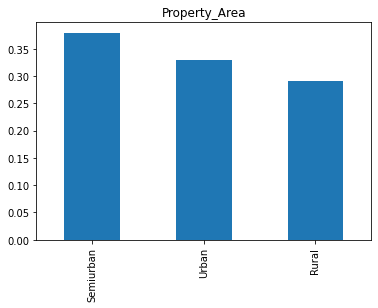

In [795]:
train_data['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()
train_data['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train_data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

**Loan Amount data is right skewed indicating outliers**

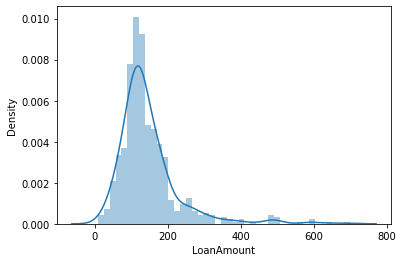

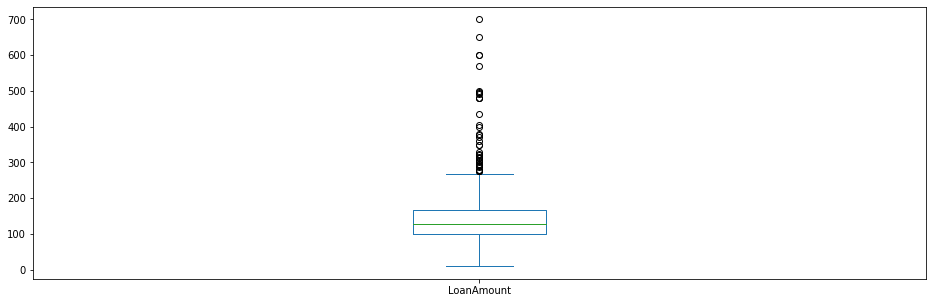

In [796]:
train_data.notna()
sns.distplot(train_data['LoanAmount'])
plt.show()
train_data['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

Applicant income is also right skewed

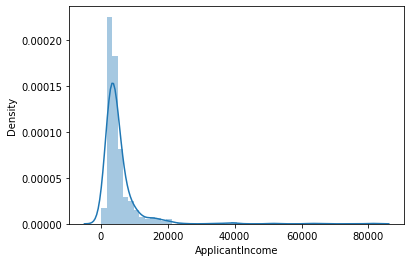

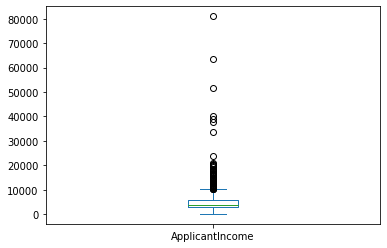

In [797]:
sns.distplot(train_data['ApplicantIncome'])
plt.show()
train_data['ApplicantIncome'].plot.box()
plt.show()

**Plot indicating the positive correaltion between Income and Education**

Text(0.5, 0.98, '')

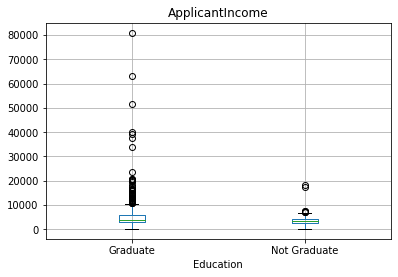

In [798]:
train_data.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

**Data Cleaning**

We concat the train and test data for cleaning

In [799]:
df=pd.concat([train_data,test_data])

In [800]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN
366,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN


In [801]:
df.shape

(981, 13)

In [802]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [803]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

For categorical values we replace the null value with mode

In [804]:
df['Gender']=df['Gender'].fillna(df.Gender.dropna().mode()[0])
df['Married']=df['Married'].fillna(df.Married.dropna().mode()[0])
df['Dependents']=df['Dependents'].fillna(df.Dependents.dropna().mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df.Self_Employed.dropna().mode()[0])

In [805]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

For numerical values we replace the null value with median 

In [806]:
df['LoanAmount']=df['LoanAmount'].fillna(df.LoanAmount.dropna().median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df.Loan_Amount_Term.dropna().median())
df['Credit_History']=df['Credit_History'].fillna(df.Credit_History.dropna().median())

In [807]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

# **Encoding the data**

In [808]:
df['Dependents'].value_counts()

0     570
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [809]:
df['Dependents']=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Self_Employed']=df.Self_Employed.map({'No':0,'Yes':1})
df['Gender']=df.Gender.map({'Female':0,'Male':1})
df['Married']=df.Married.map({'No':0,'Yes':1})
df['Education']=df.Education.map({'Not Graduate':0,'Graduate':1})
df['Property_Area']=df.Property_Area.map({'Rural':0,'Urban':1,'Semiurban':2})




Loan Id is not relevant here so we delete that feature

In [810]:
data=df.drop(columns=['Loan_ID'])

In [811]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    int64  
 1   Married            981 non-null    int64  
 2   Dependents         981 non-null    int64  
 3   Education          981 non-null    int64  
 4   Self_Employed      981 non-null    int64  
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    int64  
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(7), object(1)
memory usage: 99.6+ KB


We create a new coloumn Total Income by adding the ApplicantIncome and CoApplicantIncome for better analyzation and delete the redundant coloumns

In [812]:
data['TotalIncome']=data['ApplicantIncome']+data['CoapplicantIncome']
data=data.drop(columns=['ApplicantIncome','CoapplicantIncome'])

log function applied to get normal distribution

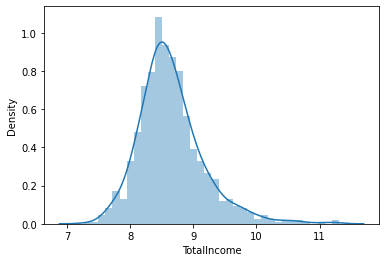

In [813]:
data['TotalIncome'] = np.log(data['TotalIncome'])
sns.distplot(data['TotalIncome'])


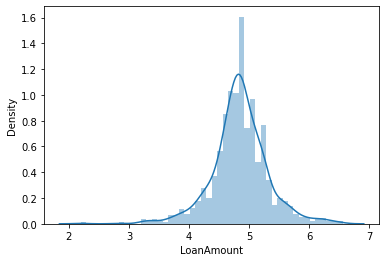

In [814]:
data['LoanAmount'] = np.log(data['LoanAmount'])
sns.distplot(data['LoanAmount'])


In [815]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            981 non-null    int64  
 1   Married           981 non-null    int64  
 2   Dependents        981 non-null    int64  
 3   Education         981 non-null    int64  
 4   Self_Employed     981 non-null    int64  
 5   LoanAmount        981 non-null    float64
 6   Loan_Amount_Term  981 non-null    float64
 7   Credit_History    981 non-null    float64
 8   Property_Area     981 non-null    int64  
 9   Loan_Status       614 non-null    object 
 10  TotalIncome       981 non-null    float64
dtypes: float64(4), int64(6), object(1)
memory usage: 92.0+ KB


# **Splitting the train and test data back after cleaning**

In [816]:
train=data.iloc[:614]
test=data.iloc[614:]

In [817]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,1,0,4.836282,360.0,1.0,1,Y,8.674026
1,1,1,1,1,0,4.852030,360.0,1.0,0,N,8.714568
2,1,1,0,1,1,4.189655,360.0,1.0,1,Y,8.006368
3,1,1,0,0,0,4.787492,360.0,1.0,1,Y,8.505323
4,1,0,0,1,0,4.948760,360.0,1.0,1,Y,8.699515


In [818]:
train['Loan_Status']=train.Loan_Status.map({'N':0,'Y':1})

In [819]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,1,0,4.836282,360.0,1.0,1,1,8.674026
1,1,1,1,1,0,4.852030,360.0,1.0,0,0,8.714568
2,1,1,0,1,1,4.189655,360.0,1.0,1,1,8.006368
3,1,1,0,0,0,4.787492,360.0,1.0,1,1,8.505323
4,1,0,0,1,0,4.948760,360.0,1.0,1,1,8.699515


In [820]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    int64  
 1   Married           614 non-null    int64  
 2   Dependents        614 non-null    int64  
 3   Education         614 non-null    int64  
 4   Self_Employed     614 non-null    int64  
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    float64
 7   Credit_History    614 non-null    float64
 8   Property_Area     614 non-null    int64  
 9   Loan_Status       614 non-null    int64  
 10  TotalIncome       614 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 57.6 KB


In [821]:
test.drop(columns=['Loan_Status'],inplace=True)

In [822]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            367 non-null    int64  
 1   Married           367 non-null    int64  
 2   Dependents        367 non-null    int64  
 3   Education         367 non-null    int64  
 4   Self_Employed     367 non-null    int64  
 5   LoanAmount        367 non-null    float64
 6   Loan_Amount_Term  367 non-null    float64
 7   Credit_History    367 non-null    float64
 8   Property_Area     367 non-null    int64  
 9   TotalIncome       367 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 31.5 KB


We observe that there better correlation between Credit_History, Property_Area and target variable Loan_Status

In [823]:
train.corr()['Loan_Status']

Gender              0.017987
Married             0.091478
Dependents          0.010118
Education           0.085884
Self_Employed      -0.003700
LoanAmount         -0.037536
Loan_Amount_Term   -0.022549
Credit_History      0.540556
Property_Area       0.137545
Loan_Status         1.000000
TotalIncome         0.007240
Name: Loan_Status, dtype: float64

The distribution is right-skewed. So, log transformation done to make the distribution normal.

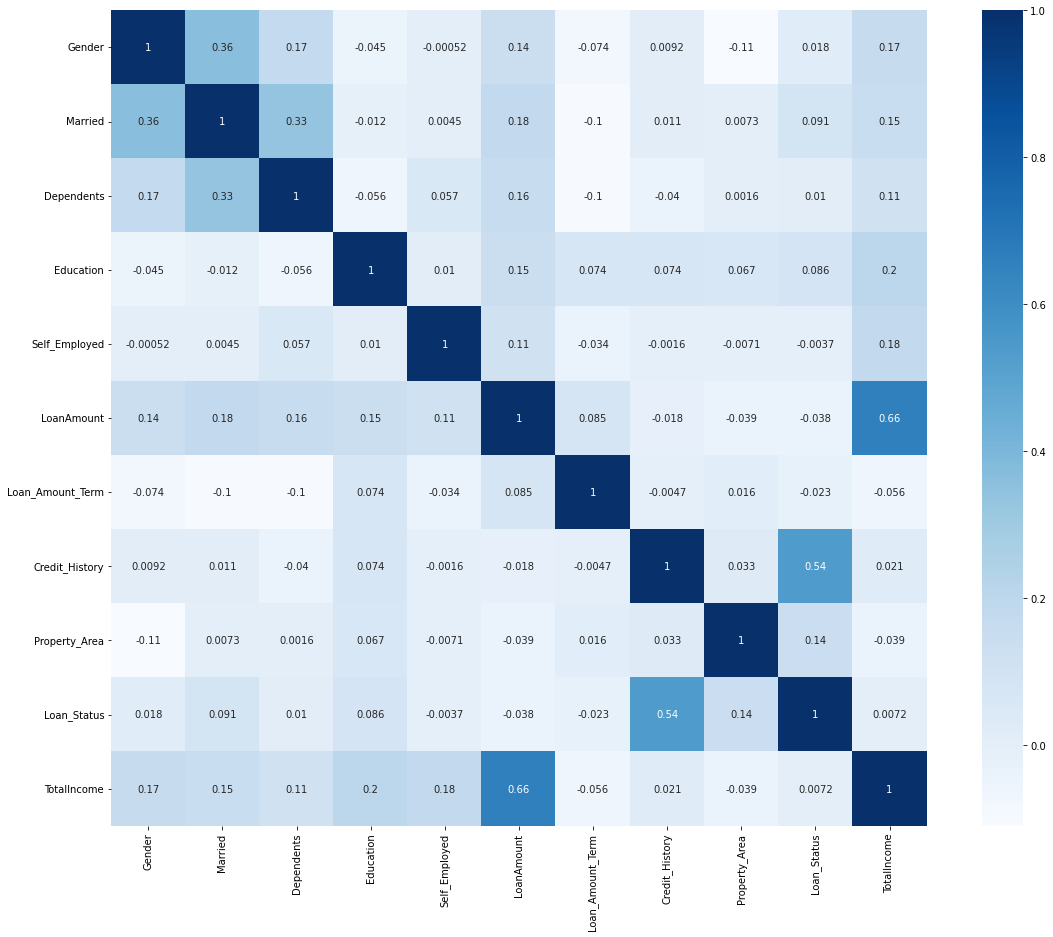

In [824]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(matrix,square=True,cmap='Blues', annot = True)

# **Splitting the Train data into train and test for modeling**

In [825]:
Data1=train.drop(columns=['Loan_Status'])
X=Data1.values
y=train['Loan_Status'].values

In [826]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

 **SCALING**

In [827]:
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

# **Modeling**

**Logistic Regression**

In [828]:
lr=LogisticRegression()
lr.fit(X_train_scale,y_train)

LogisticRegression()

In [829]:
lr_pred=lr.predict(X_test_scale)
lr_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [830]:
lr_score=accuracy_score(lr_pred,y_test)
print('Logistic Regression Accuracy',lr_score)
print('Logistic Regression Confusion Matrix\n',confusion_matrix(lr_pred,y_test))
print('Logistic Regression Classification Report\n',classification_report(lr_pred,y_test))

Logistic Regression Accuracy 0.7560975609756098
Logistic Regression Confusion Matrix
 [[19  1]
 [29 74]]
Logistic Regression Classification Report
               precision    recall  f1-score   support

           0       0.40      0.95      0.56        20
           1       0.99      0.72      0.83       103

    accuracy                           0.76       123
   macro avg       0.69      0.83      0.70       123
weighted avg       0.89      0.76      0.79       123



**KNN Classification**

In [831]:
from sklearn import neighbors
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_scale,y_train)
knn_pred=knn.predict(X_test_scale)
knn_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [832]:
knn_score=accuracy_score(knn_pred,y_test)
print('KNN Accuracy',knn_score)
print('KNN Confusion Matrix\n',confusion_matrix(knn_pred,y_test))
print('KNN Classification Report\n',classification_report(knn_pred,y_test))

KNN Accuracy 0.7479674796747967
KNN Confusion Matrix
 [[20  3]
 [28 72]]
KNN Classification Report
               precision    recall  f1-score   support

           0       0.42      0.87      0.56        23
           1       0.96      0.72      0.82       100

    accuracy                           0.75       123
   macro avg       0.69      0.79      0.69       123
weighted avg       0.86      0.75      0.77       123



**DecisionTreeClassifier**

In [833]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',max_depth=500,random_state=9,max_leaf_nodes=200,min_samples_split=200)   
dt.fit(X_train_scale,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=500, max_leaf_nodes=200,
                       min_samples_split=200, random_state=9)

In [834]:
dt_pred=dt.predict(X_test_scale)
dt_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [835]:
dt_score=accuracy_score(dt_pred,y_test)
print('DT CL Accuracy',dt_score)
print('DT CL Confusion Matrix\n',confusion_matrix(dt_pred,y_test))
print('DT CL Classification Report\n',classification_report(dt_pred,y_test))

DT CL Accuracy 0.7479674796747967
DT CL Confusion Matrix
 [[20  3]
 [28 72]]
DT CL Classification Report
               precision    recall  f1-score   support

           0       0.42      0.87      0.56        23
           1       0.96      0.72      0.82       100

    accuracy                           0.75       123
   macro avg       0.69      0.79      0.69       123
weighted avg       0.86      0.75      0.77       123



**BEST MODEL SELECTION**

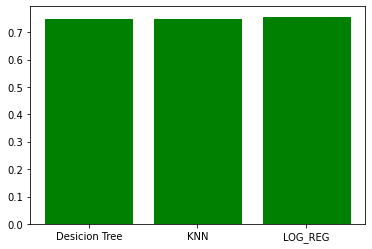

In [836]:
Scores=[dt_score,knn_score,lr_score]
plt.bar(['Desicion Tree','KNN','LOG_REG'],Scores,COLOR='GREEN')
plt.show()

**Predicting the Loan Status for test data using Logistic Regression and saving as .csv file**

In [838]:
test_data_scale=scaler.transform(test)
pred = lr.predict(test_data_scale)
pd.Series(pred).to_csv('resultLoanStPrd.csv')